# **EDA of various Phopia Types👻**!


### 🔍 **: الخصائص التي سنقوم بتحليلها تشمل**  
العمر | الجنس | نوع الفوبيا | المنطقة الجغرافية | مستوى الخوف | مدى تكرار المواجهة | السعي للعلاج

---

### 🤯 **: أنواع الفوبيا الموجودة في بياناتنا**

رهاب الحقن | رهاب الدم | رهاب الأفاعي | رهاب الطيران | رهاب العناكب | رهاب الأماكن المغلقة | رهاب المرتفعات | رهاب الأماكن المفتوحة أو المزدحمة
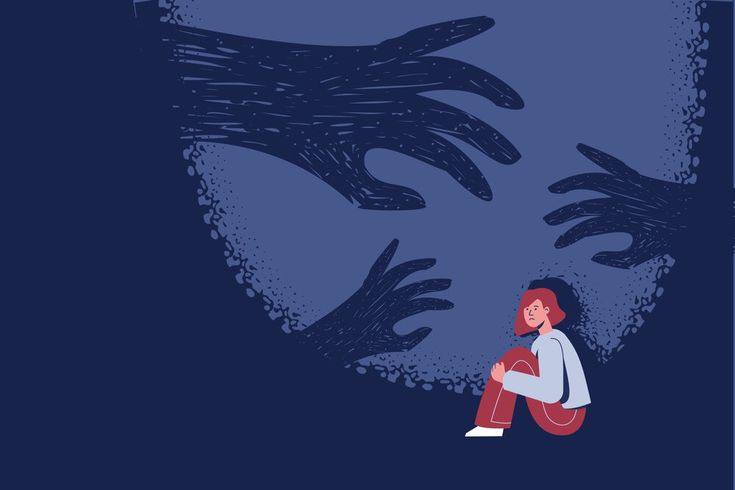

### **📂 Loading the Phobia Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("/content/phobia_dataset.csv", sep=';') # قراءة البيانات
df.head() # عرض اول 5 سطور

,Phobia_Type,Age,Gender,Region,Severity_Level,Encounter_Frequency,Treatment_Seeking
0,Trypanophobia,32.0,Male,Asia,Mild,Occasionally,1.0
1,NaN,50.0,Female,Middle East,Mild,Rarely,1.0
2,Hematophobia,NaN,Female,Asia,Mild,Rarely,1.0
3,Ophidiophobia,67.0,Male,Middle East,Moderate,Occasionally,1.0
4,Aerophobia,43.0,Male,Europe,Severe,Rarely,0.0



### **🔍 Initial Data Inspection**

In [ ]:
print('🧾INFO:')
df.info() # معلومات عامه لللبيانات

print('\n📊DESCRIBE:')
print(df.describe()) # معلومات احصائيه للبيانات

print('\n📐SHAPE:') # حجم الجدول
print('The number of records:',df.shape[0])
print('The number of features:',df.shape[1])

🧾INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Phobia_Type          700 non-null    object 
 1   Age                  700 non-null    float64
 2   Gender               726 non-null    object 
 3   Region               698 non-null    object 
 4   Severity_Level       726 non-null    object 
 5   Encounter_Frequency  726 non-null    object 
 6   Treatment_Seeking    692 non-null    float64
dtypes: float64(2), object(5)
memory usage: 39.8+ KB

📊DESCRIBE:
              Age  Treatment_Seeking
count  700.000000         692.000000
mean    40.095714           0.307803
std     17.909428           0.461919
min     10.000000           0.000000
25%     25.000000           0.000000
50%     39.500000           0.000000
75%     56.250000           1.000000
max     69.000000           1.000000

📐SHAPE:
The number of records: 726
The n

In [ ]:
print('🚫The number of missing values for each column:')
print(df.isnull().sum())  # معرفة القيم المفقودة

print('\n❗❗The number of duplicates:',df.duplicated().sum()) # معرفة القيم المتككررة

🚫The number of missing values for each column:
Phobia_Type            26
Age                    26
Gender                  0
Region                 28
Severity_Level          0
Encounter_Frequency     0
Treatment_Seeking      34
dtype: int64

❗❗The number of duplicates: 28


### **🧹 Data Cleaning and Preparation**





In [ ]:
drop_duplicates = df.drop_duplicates() # انشاء هيكل بيانات جديد بدون قيم المكررة
print('❗❗The number of duplicates after cleaning:',drop_duplicates.duplicated().sum()) # التأكد من الحذف

❗❗The number of duplicates after cleaning: 0


In [ ]:
for column in df.columns:
    if df[column].isnull().sum() > 0:
        if df[column].dtype in ['float64', 'int64']:
            # تعويض القيم الرقمية بالمتوسط
            df[column].fillna(df[column].mean(), inplace=True)
        else:
            # تعويض القيم النصية بالمنوال
            df[column].fillna(df[column].mode()[0], inplace=True)

print('🚫The number of missing values (after filling):')
print(df.isnull().sum()) # التأكد من التعبئة

print('\n🧾INFO (after filling):')
df.info()

print('\n🧩The data frame after filling:')
df.head()

🚫The number of missing values (after filling):
Phobia_Type            0
Age                    0
Gender                 0
Region                 0
Severity_Level         0
Encounter_Frequency    0
Treatment_Seeking      0
dtype: int64

🧾INFO (after filling):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Phobia_Type          726 non-null    object 
 1   Age                  726 non-null    float64
 2   Gender               726 non-null    object 
 3   Region               726 non-null    object 
 4   Severity_Level       726 non-null    object 
 5   Encounter_Frequency  726 non-null    object 
 6   Treatment_Seeking    726 non-null    float64
dtypes: float64(2), object(5)
memory usage: 39.8+ KB

🧩The data frame after filling:


,Phobia_Type,Age,Gender,Region,Severity_Level,Encounter_Frequency,Treatment_Seeking
0,Trypanophobia,32.000000,Male,Asia,Mild,Occasionally,1.0
1,Arachnophobia,50.000000,Female,Middle East,Mild,Rarely,1.0
2,Hematophobia,40.095714,Female,Asia,Mild,Rarely,1.0
3,Ophidiophobia,67.000000,Male,Middle East,Moderate,Occasionally,1.0
4,Aerophobia,43.000000,Male,Europe,Severe,Rarely,0.0


### **🔍 Feature Analysis – Numerical**

Skewness of Age: 0.03878563335631611
Skewness type: Positive📈
📊 Histogram for Age


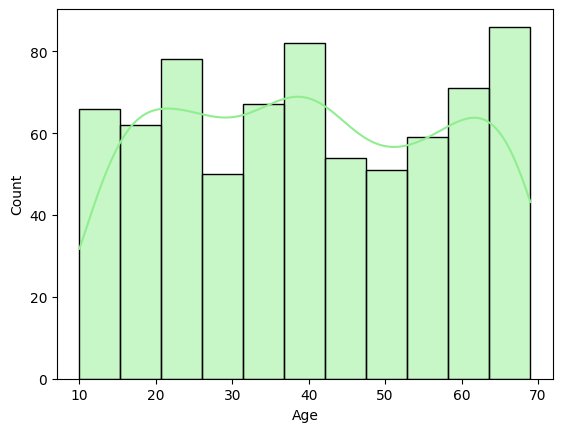

Skewness of Treatment_Seeking: 0.8547479911191957
Skewness type: Positive📈
📊 Histogram for Treatment_Seeking


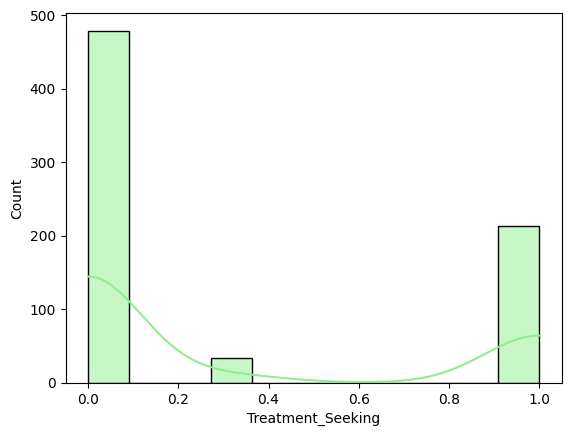

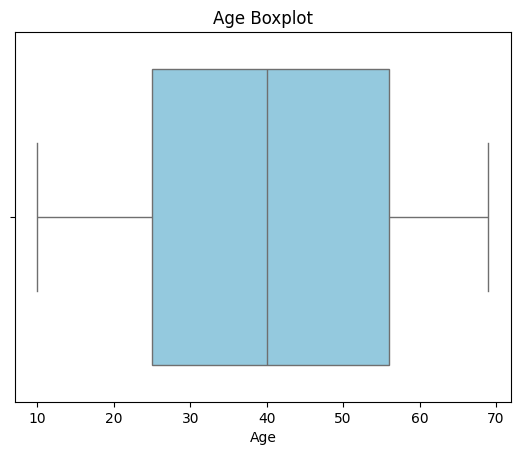

In [ ]:
warnings.filterwarnings('ignore')  # تجاهل التحذيرات

for i in df.select_dtypes(include='number').columns: # اختيار الاعمدة الرقمية فقط
    sns.histplot(data=df, x=i, color='lightgreen', kde=True)
    print(f'Skewness of {i}:', df[i].skew())
    if df[i].skew() > 0: print('Skewness type: Positive📈')
    elif df[i].skew() < 0: print('Skewness type: Negative📉')
    else: print('Skewness type: Normal🔵')
    print(f'📊 Histogram for {i}')
    plt.show()

sns.boxplot(x=df['Age'], color='skyblue')
plt.title('Age Boxplot')
plt.show()

### **🔢 Encoding Categorical Variables**

In [ ]:
label_encoder = LabelEncoder()# تحويل او تشفير (0\1)
df["Gender_encoded"] = label_encoder.fit_transform(df["Gender"])

df["Severity_Level"] = df["Severity_Level"].str.lower().str.strip()
df["Encounter_Frequency"] = df["Encounter_Frequency"].str.lower().str.strip()
df["Gender"] = df["Gender"].str.lower().str.strip()

df_encoded = pd.get_dummies(df, columns=['Gender'])
df_encoded.head()

,Phobia_Type,Age,Region,Severity_Level,Encounter_Frequency,Treatment_Seeking,Gender_encoded,Gender_female,Gender_male
0,Trypanophobia,32.000000,Asia,mild,occasionally,1.0,1,False,True
1,Arachnophobia,50.000000,Middle East,mild,rarely,1.0,0,True,False
2,Hematophobia,40.095714,Asia,mild,rarely,1.0,0,True,False
3,Ophidiophobia,67.000000,Middle East,moderate,occasionally,1.0,1,False,True
4,Aerophobia,43.000000,Europe,severe,rarely,0.0,1,False,True


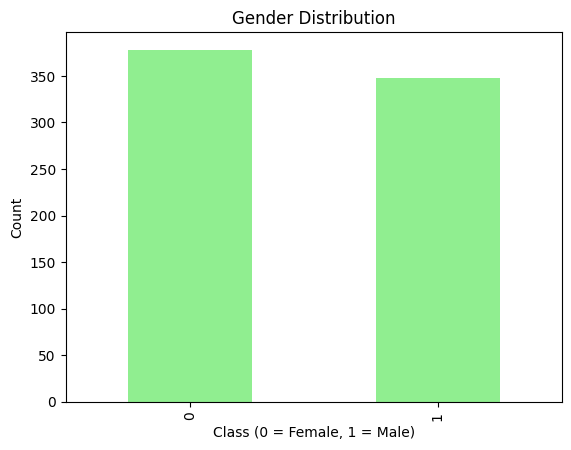

In [ ]:
df["Gender_encoded"].value_counts().plot(kind='bar', title="Gender Distribution",color='lightgreen')
plt.xlabel("Class (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.show()

### **⚡Outliers تحليل القيم الشاذة**

In [ ]:
num_col = ['Age','Treatment_Seeking']

for col in num_col:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  print(f"Number of outliers for {col} : {outliers.shape[0]}")

Number of outliers for Age : 0
Number of outliers for Treatment_Seeking : 0


### **🧐 Some Conclusions from the charts**

most common types of phobia📊:


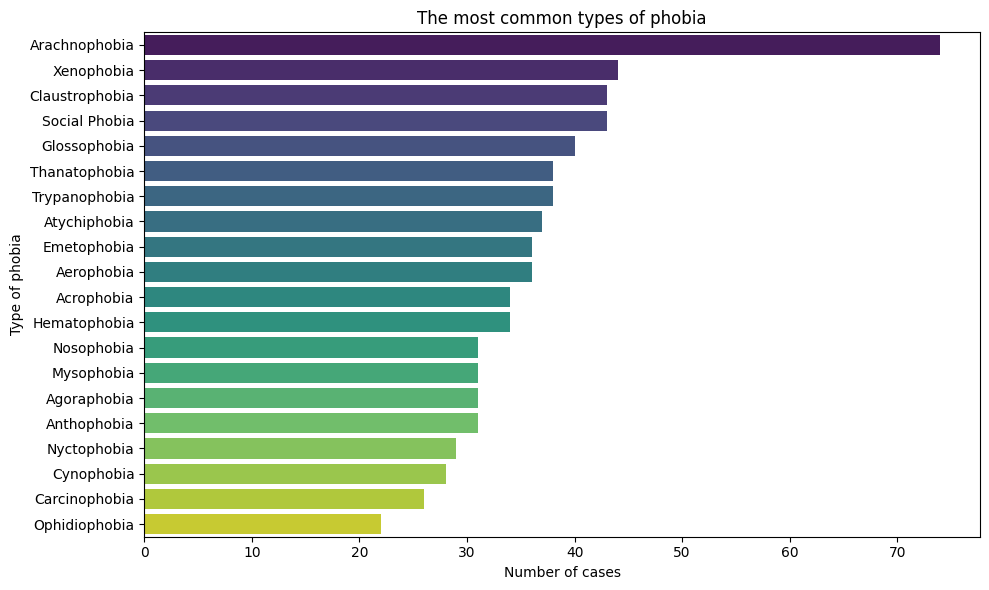

Most common phobia is :  Arachnophobia


In [ ]:
phobia_counts = df['Phobia_Type'].value_counts()

plt.figure(figsize =(10,6))
sns.barplot(x = phobia_counts.values , y = phobia_counts.index, palette = 'viridis')

plt.title('The most common types of phobia')
plt.xlabel('Number of cases')
plt.ylabel('Type of phobia')
plt.tight_layout()
plt.show()

most_common_phobia = phobia_counts.idxmax()
print('Most common phobia is : ' , most_common_phobia)

the number of males and femals for each type of phobia📊:

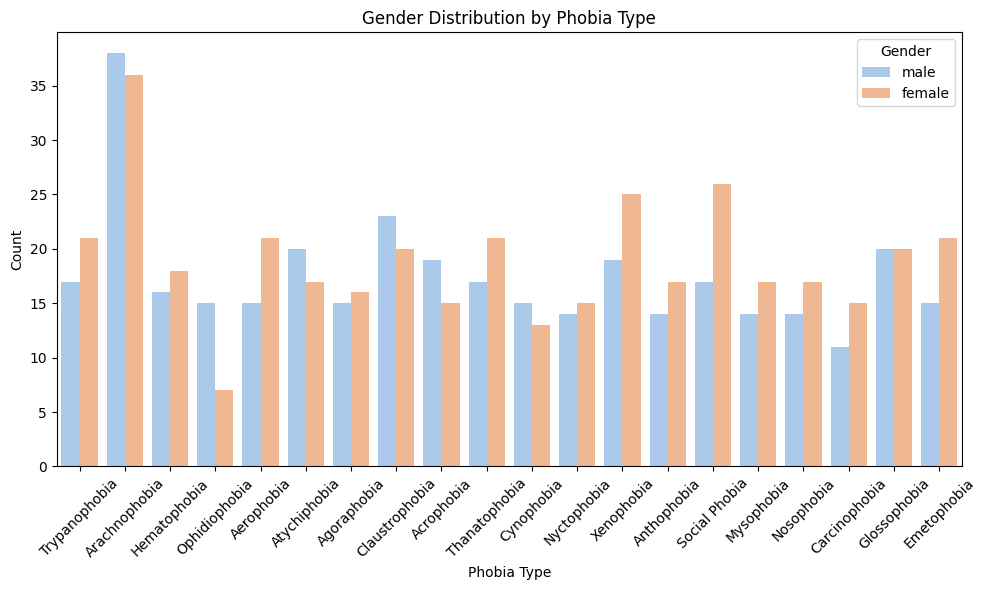

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Phobia_Type', hue='Gender', palette='pastel')
plt.title('Gender Distribution by Phobia Type')
plt.xlabel('Phobia Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

   









   .













   .

































































   .
   

### **📏 Normalization & Scaling Numerical Features**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaled_cols = ['Age', 'Treatment_Seeking']
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_encoded[scaled_cols])

scaled_df = pd.DataFrame(scaled_data, columns=[col + '_scaled' for col in scaled_cols])
df_final = pd.concat([df_encoded.reset_index(drop=True), scaled_df], axis=1)

df_final.head()

,Phobia_Type,Age,Region,Severity_Level,Encounter_Frequency,Treatment_Seeking,Gender_encoded,Gender_female,Gender_male,Age_scaled,Treatment_Seeking_scaled
0,Trypanophobia,32.000000,Asia,mild,occasionally,1.0,1,False,True,0.372881,1.0
1,Arachnophobia,50.000000,Middle East,mild,rarely,1.0,0,True,False,0.677966,1.0
2,Hematophobia,40.095714,Asia,mild,rarely,1.0,0,True,False,0.510097,1.0
3,Ophidiophobia,67.000000,Middle East,moderate,occasionally,1.0,1,False,True,0.966102,1.0
4,Aerophobia,43.000000,Europe,severe,rarely,0.0,1,False,True,0.559322,0.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# نسخة من البيانات
data_ml = df_final.copy()


In [ ]:
# تحديد Features و Target
X = data_ml.drop(columns=['Phobia_Type'])
y = data_ml['Phobia_Type']


In [ ]:
# Step 2: تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"✅ Training samples: {len(X_train)}")
print(f"✅ Testing samples: {len(X_test)}")

✅ Training samples: 580
✅ Testing samples: 146


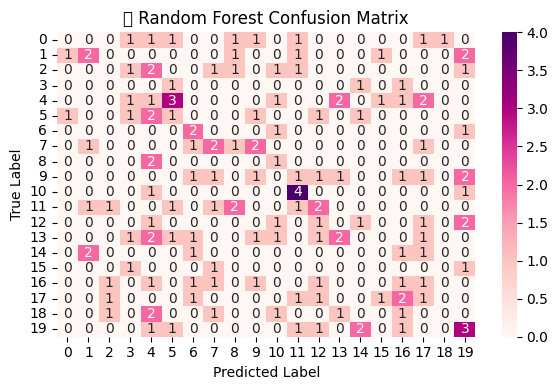

In [ ]:


# مصفوفة الالتباس
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="RdPu",
            xticklabels=model_rf.classes_,  # يستخدم أسماء الفئات من النموذج
            yticklabels=model_rf.classes_)
plt.title("🌼 Random Forest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# افتراضياً y في شكل نصي (Phobia_Type)
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # تحويل الأسماء لأرقام

# قسم البيانات (تأكد أنك تستخدم y_encoded وليس y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# درب موديل Logistic Regression
model_lr = LogisticRegression(max_iter=200, random_state=42)
model_lr.fit(X_train, y_train)

# توقع
y_pred_lr = model_lr.predict(X_test)

# استعمل أسماء الفئات النصية من الـ LabelEncoder
target_names = le.classes_

# طباعة تقرير التصنيف
print("📊 Logistic Regression Classification Report:\n")


📊 Logistic Regression Classification Report:



In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# حساب مصفوفة الالتباس
conf_matrix = confusion_matrix(y_test, y_pred_lr)

print("مصفوفة الالتباس:\n", conf_matrix)

# عدد التوقعات الصحيحة لكل فئة (Diagonal elements)
true_positives = np.diag(conf_matrix)
print("عدد التوقعات الصحيحة (True Positives) لكل فئة:", true_positives)

# لو تبغى عدد العينات في كل فئة حسب الحقيقة (support)
support = conf_matrix.sum(axis=1)
print("عدد العينات الحقيقية لكل فئة:", support)


مصفوفة الالتباس:
 [[0 0 0 1 5 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0]
 [0 0 0 0 3 0 1 0 0 0 0 0 0 0 2 0 1 0 0 1]
 [0 0 0 0 4 1 0 0 0 0 0 0 0 0 0 0 2 0 0 1]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1]
 [0 1 0 0 7 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2]
 [0 0 0 0 6 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 2 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0]
 [0 0 0 0 2 0 1 2 0 0 0 0 1 0 0 0 2 0 0 2]
 [0 0 0 0 2 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1]
 [0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 5 0 1 0]
 [0 2 0 0 1 0 0 0 0 0 0 0 0 0 1 0 2 0 1 0]
 [0 1 0 1 7 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0]
 [0 1 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1]
 [0 0 1 0 2 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1]
 [0 1 0 1 3 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0]
 [0 1 0 0 2 0 1 1 1 0 1 0 0 0 0 0 1 0 2 0]]
عدد التوقعات الصحيحة (True Positives) لكل فئة: [0 0 0 0 7 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0]
عدد العينات الحقيقية لكل فئة: [ 